In [1]:
from numpy import linalg as la
import scipy.cluster.vq as vq
import scipy.ndimage as ndimage
import scipy as sp
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.feature_extraction import image
from skimage.color import rgb2gray
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [2]:
x, y = np.indices((100, 100))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
# img = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

print(graph)

  (0, 1)	0.8211803017383559
  (1, 2)	0.6233424566527185
  (2, 3)	0.7907011607091964
  (3, 4)	0.8704956403448795
  (4, 5)	0.9368623511603199
  (5, 6)	0.6286844552842284
  (6, 7)	0.8406578168467603
  (7, 8)	0.9165726810960915
  (8, 9)	0.7624095607639273
  (9, 10)	0.9896552538617553
  (11, 12)	0.4842687341648038
  (12, 13)	0.8092730069123026
  (13, 14)	0.43781706334122444
  (14, 15)	0.9592586275466278
  (15, 16)	0.612114273597269
  (16, 17)	0.6833912004427901
  (17, 18)	0.7892557889178287
  (18, 19)	0.4395202311052731
  (19, 20)	0.904382996379249
  (20, 21)	0.9487456227336655
  (21, 22)	0.8930458499849855
  (22, 23)	0.6031309024445193
  (23, 24)	0.8433066581499807
  (24, 25)	0.4408409032255859
  (26, 27)	0.7860679771977851
  :	:
  (2653, 2653)	0.09292580021756267
  (2654, 2654)	0.0879185752595064
  (2655, 2655)	0.09374180211669376
  (2656, 2656)	0.19234767014534085
  (2657, 2657)	0.06473907551316788
  (2658, 2658)	0.06814626445173327
  (2659, 2659)	0.04725917816146664
  (2660, 2660)	0.055

(2678, 2678)
[[ 0.00155524 -0.03255556  0.01359327]
 [-0.02497317  0.01371969  0.00811341]
 [ 0.02658462  0.01627058  0.00829304]
 [ 0.00020239 -0.00423629 -0.03161368]]
2678
[0 1 2 3]


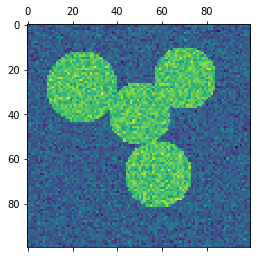

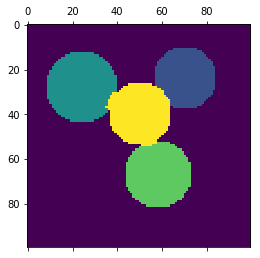

In [5]:
A = graph
D = np.diag(np.ravel(np.sum(A,axis=1)))
L = D - A

# U has matrix of all eigenvectors arranged and l has sorted eigenvalues
l, U = la.eigh(L)

# Commented out code - Fiedler vector for 2-clustering alone
'''
f = U[:,1]
labels = np.ravel(np.sign(f))
k=2
'''

# Run K-Means on eigenvector matrix ( Other than 0th column )
# Input k here to specify required number of clusters
# means will have the list of K-means cluster centres
# labels show the different cluster labels detected : Note that some times
# K-Means doesn't converge and you might have 1 cluster lesser than 'K'
k = 4
means, labels = vq.kmeans2(U[:,1:k], k)
print(U.shape)
print(means)
print(labels.size)
print(np.unique(labels))

label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)
plt.show()